# Feature Engineering

Feature engineering é o processo de transformar dados brutos em features que melhor representam o fenômeno que estamos tentando modelar. É uma das etapas mais importantes do processo de modelagem de dados, pois é a partir dela que conseguimos extrair o máximo de informação dos dados.

In [49]:
import polars as pl
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Parte 1 e 2 - Normalização e Padronização

Normalização (e padronização) é o processo de transformar os dados em uma escala comum. Isso é importante pois muitos algoritmos de aprendizado de máquina não funcionam bem quando os atributos possuem escalas diferentes.

No caso da **normalização**, os dados são transformados para que fiquem entre 0 e 1. Já na **padronização** (ou z-score normalization), os dados são transformados para que a média seja 0 e o desvio padrão seja 1.

In [5]:
df = pl.read_csv('data/imoveis.csv')
df.sample(5)

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
str,f64,f64,f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str
"""2014-05-10 00:…",549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,"""10834 31st Ave…","""Seattle""","""WA 98146""","""USA"""
"""2014-06-25 00:…",283000.0,3.0,1.0,890,8400,1.0,0,0,4,890,0,1954,1979,"""1109 N 28th Pl…","""Renton""","""WA 98056""","""USA"""
"""2014-05-28 00:…",124740.0,3.0,1.0,1340,15600,1.0,0,0,4,1340,0,1978,2000,"""31118 149th Av…","""Kent""","""WA 98042""","""USA"""
"""2014-06-11 00:…",785000.0,3.0,3.5,4500,21870,2.0,0,0,3,4500,0,2004,2003,"""13528 SE 333rd…","""Auburn""","""WA 98092""","""USA"""
"""2014-05-02 00:…",499950.0,4.0,2.5,2860,3345,2.0,0,0,3,2190,670,2004,2003,"""20120 137th Av…","""Woodinville""","""WA 98072""","""USA"""


Vamos analisar as correlações entre as variáveis do dataset

In [14]:
df_corr = df.select(
    pl.col(pl.Int64, pl.Float64)
)

df_corr = df_corr.corr().insert_at_idx(0, pl.Series('colunas', df_corr.columns))
df_corr

colunas,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""price""",1.0,0.200336,0.32711,0.43041,0.050451,0.151461,0.135648,0.228504,0.034915,0.36757,0.210427,0.021857,-0.028774
"""bedrooms""",0.200336,1.0,0.54592,0.594884,0.068819,0.177895,-0.003483,0.111028,0.02508,0.484705,0.334165,0.142461,-0.061082
"""bathrooms""",0.32711,0.54592,1.0,0.761154,0.107837,0.486428,0.076232,0.21196,-0.119994,0.689918,0.29802,0.463498,-0.215886
"""sqft_living""",0.43041,0.594884,0.761154,1.0,0.210538,0.34485,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
"""sqft_lot""",0.050451,0.068819,0.107837,0.210538,1.0,0.00375,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.02273
"""floors""",0.151461,0.177895,0.486428,0.34485,0.00375,1.0,0.022024,0.031211,-0.275013,0.522814,-0.25551,0.467481,-0.233996
"""waterfront""",0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.0,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
"""view""",0.228504,0.111028,0.21196,0.311009,0.073907,0.031211,0.360935,1.0,0.063077,0.174327,0.321602,-0.064465,0.022967
"""condition""",0.034915,0.02508,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.0,-0.178196,0.200632,-0.399698,-0.186818


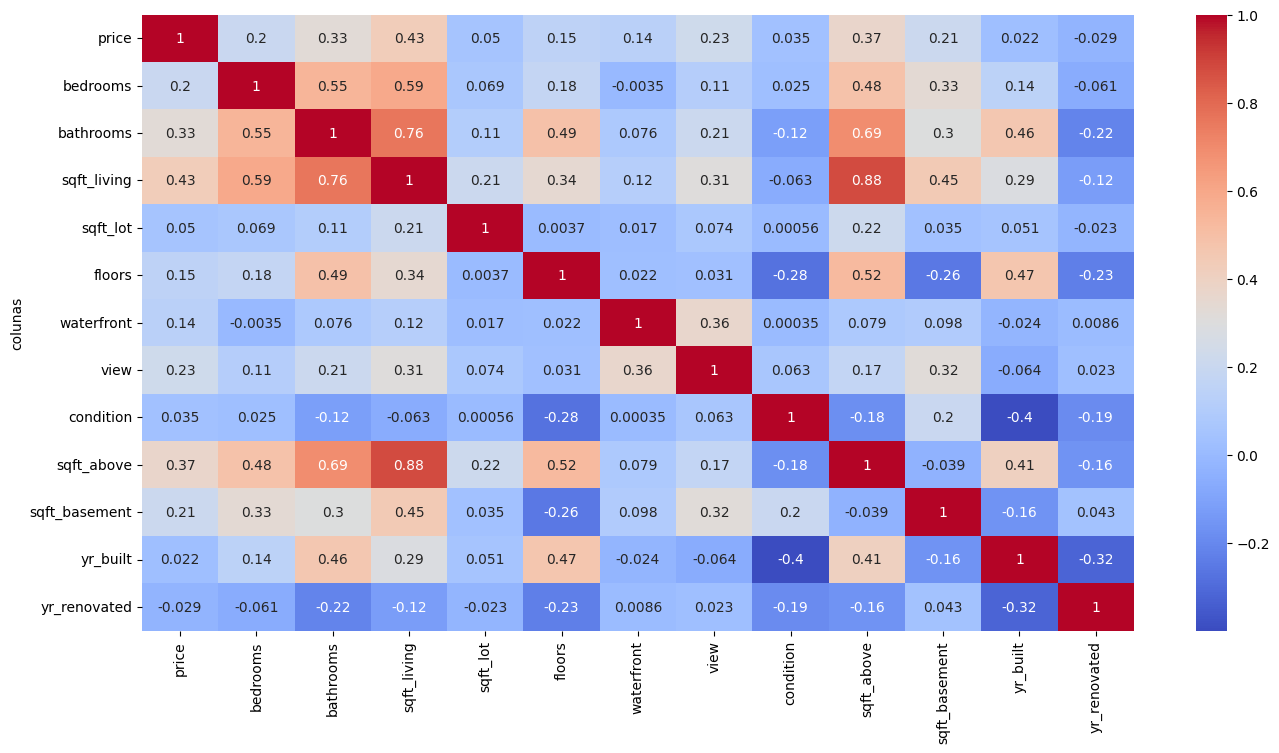

In [15]:
plt.figure(figsize=(16, 8))
sns.heatmap(
    df_corr.to_pandas().set_index('colunas'),
    annot=True,
    cmap='coolwarm'
);

Vamos selecionar as variáveis que possuem maior correlação com a variável target (`price`)

In [17]:
x = df.select(pl.col('sqft_living', 'bathrooms'))
y = df.select(pl.col('price'))


Vamos observar a correlação através do gráfico de dispersão

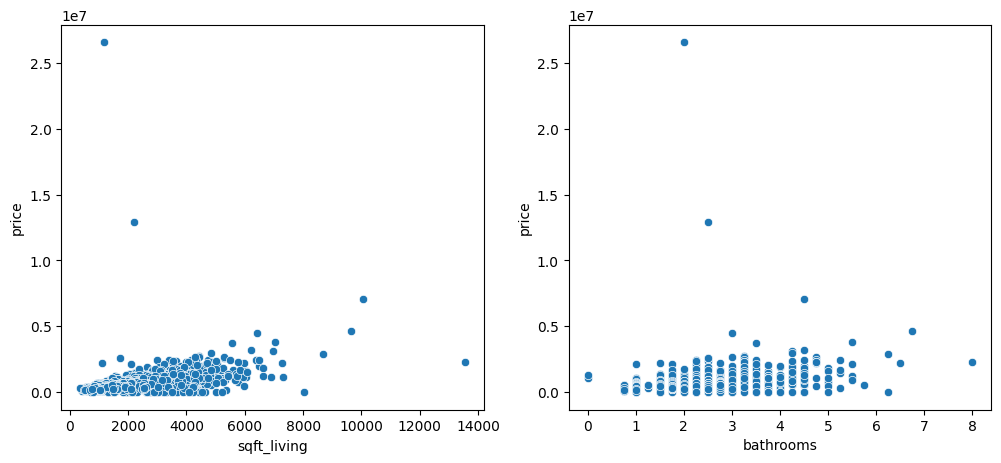

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(
    data=df,
    x='sqft_living',
    y='price',
    ax=ax[0]
);

sns.scatterplot(
    data=df,
    x='bathrooms',
    y='price',
    ax=ax[1]
);

Podemos perceber que as variáveis `sqft_living` e `bathroom` possuem unidades de medida e escalas diferentes. Isso pode ser um problema para alguns algoritmos de aprendizado de máquina.

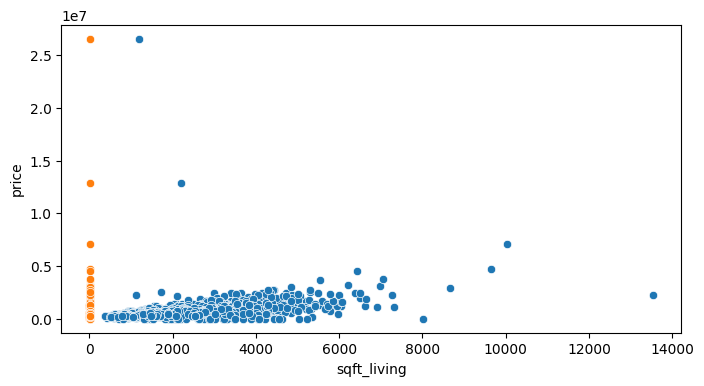

In [25]:
fig = plt.figure(figsize=(8, 4))

sns.scatterplot(data=df, x='sqft_living', y='price');
sns.scatterplot(data=df, x='bathrooms', y='price');

Podemos analisar a distribuição dos dados através do histograma também

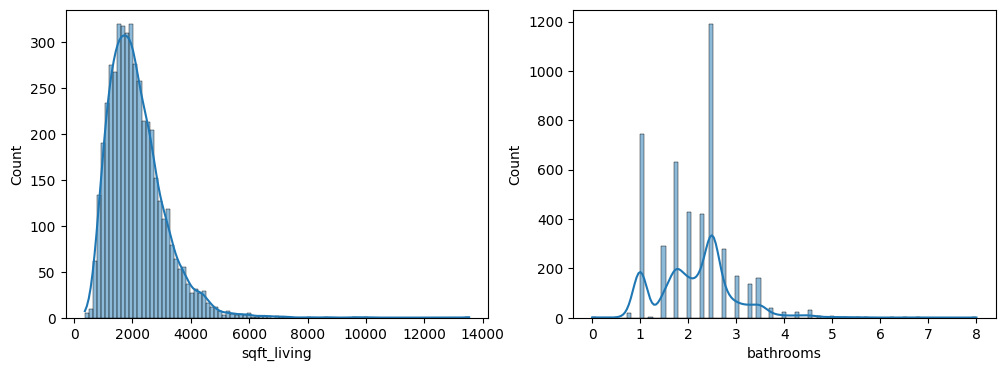

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df, x='sqft_living', kde=True, ax=ax[0]);
sns.histplot(data=df, x='bathrooms', kde=True, ax=ax[1]);

Precisamos normalizar (ou padronizar) os dados para que eles fiquem em uma escala comum.

## Parte 3 - Transformação das Variáveis

Iremos utilizar os seguintes métodos de transformação:

- StandardScaler: esse método transforma os dados para que a média seja 0 e o desvio padrão seja 1. Para isso, ele utiliza a média e o desvio padrão dos dados e aplica a seguinte fórmula: `z = (x - u) / s`, onde `u` é a média e `s` é o desvio padrão (z-score).

- MinMaxScaler: esse método transforma os dados para que fiquem entre 0 e 1. Para isso, ele utiliza o valor mínimo e o valor máximo dos dados e aplica a seguinte fórmula: `x_scaled = (x - x.min) / (x.max - x.min)`

In [39]:
scaler = StandardScaler()

scaler.fit(x)
x_std = scaler.transform(x)
x_std = pl.DataFrame(x_std, schema=x.columns)

Vamos verificar o histograma antes e depois da transformação

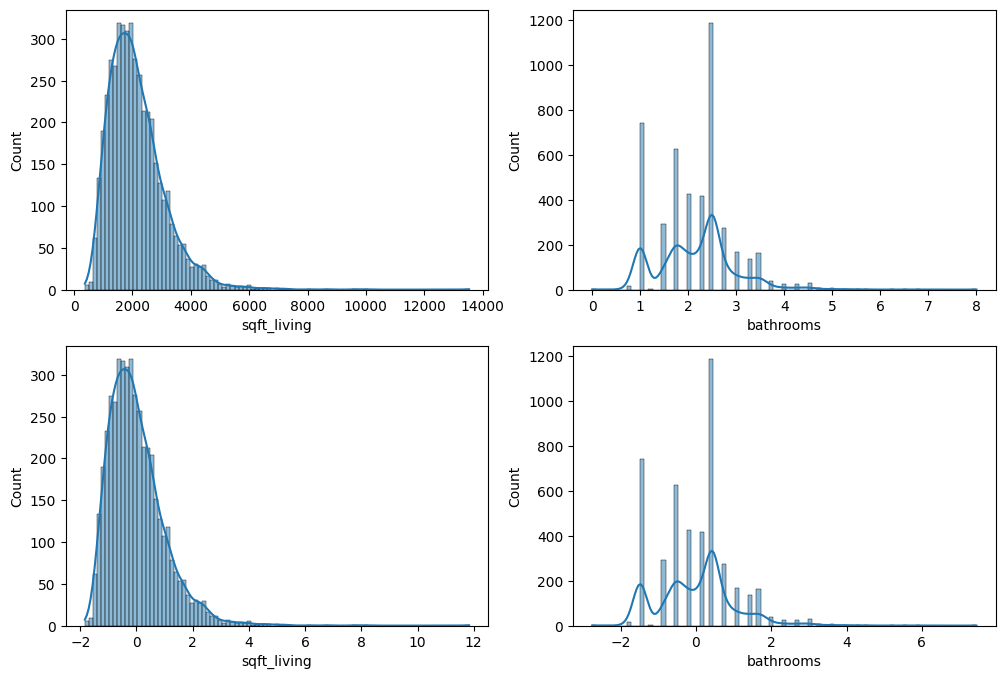

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data=x, x='sqft_living', kde=True, ax=ax[0][0]);
sns.histplot(data=x, x='bathrooms', kde=True, ax=ax[0][1]);
sns.histplot(data=x_std, x='sqft_living', kde=True, ax=ax[1][0]);
sns.histplot(data=x_std, x='bathrooms', kde=True, ax=ax[1][1]);

Podemos também padronizar os dados utilizando o método `MinMaxScaler`

In [44]:
scaler = MinMaxScaler()

scaler.fit(x)
x_mms = scaler.transform(x)
x_mms = pl.DataFrame(x_mms, schema=x.columns)

Vamos verificar o histograma antes e depois da transformação

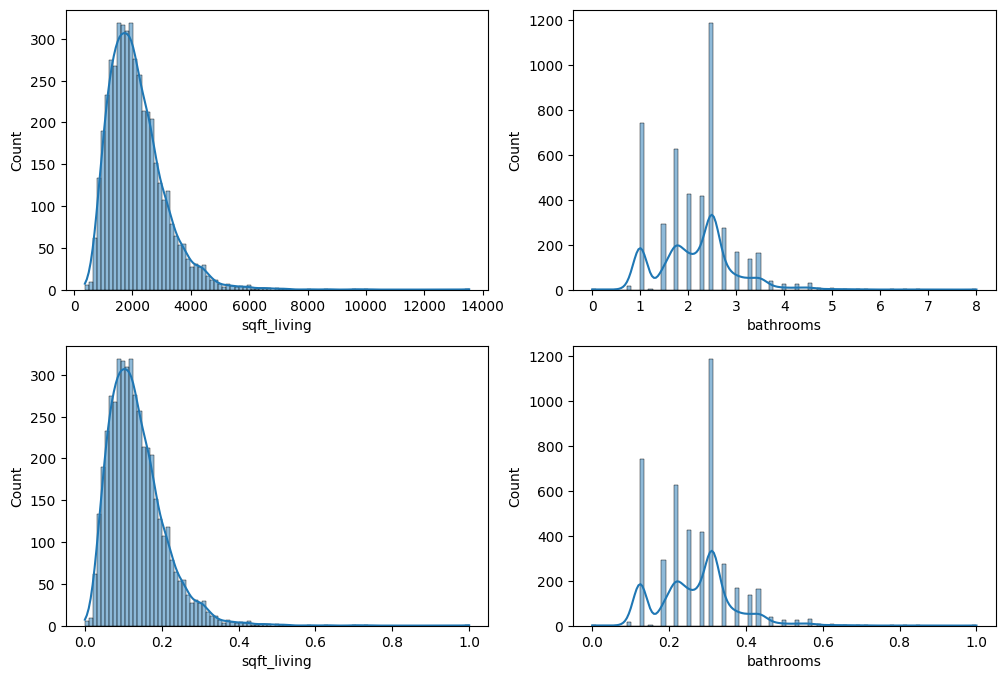

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data=x, x='sqft_living', kde=True, ax=ax[0][0]);
sns.histplot(data=x, x='bathrooms', kde=True, ax=ax[0][1]);
sns.histplot(data=x_mms, x='sqft_living', kde=True, ax=ax[1][0]);
sns.histplot(data=x_mms, x='bathrooms', kde=True, ax=ax[1][1]);

Vamos verificar o scatterplot das duas variáveis ap's a transformação

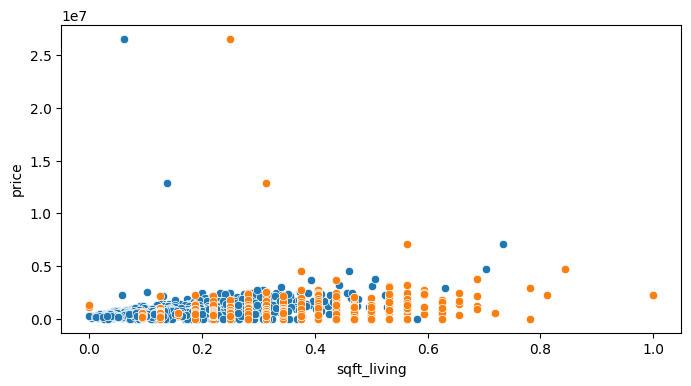

In [47]:
fig = plt.figure(figsize=(8, 4))

sns.scatterplot(x=x_mms['sqft_living'], y=y['price']);
sns.scatterplot(x=x_mms['bathrooms'], y=y['price']);

## Parte 4 - Treinamento e Avaliação do Modelo

Para verificar se a transformação dos dados realmente melhorou o desempenho do modelo, vamos treinar e avaliar o modelo utilizando os dados originais e os dados transformados.

In [58]:
X = df.select(pl.col('sqft_living', 'bathrooms'))
y = df.select(pl.col('price'))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [59]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3450, 1150, 3450, 1150)

In [60]:
mms = MinMaxScaler()
mms.fit(X_train)

X_train_norm = mms.transform(X_train)
X_test_norm = mms.transform(X_test)

Vamos treinar o modelo de regressão linear

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_hat = lr.predict(X_test)

lr_norm = LinearRegression()
lr_norm.fit(X_train_norm, y_train)

y_hat_norm = lr_norm.predict(X_test_norm)

Vamos avaliar os modelos utilizando MSE, MAE e R2

In [64]:
lr_mse = mean_squared_error(y_test, y_hat)
lr_mae = mean_absolute_error(y_test, y_hat)
lr_r2 = r2_score(y_test, y_hat)

lr_norm_mse = mean_squared_error(y_test, y_hat_norm)
lr_norm_mae = mean_absolute_error(y_test, y_hat_norm)
lr_norm_r2 = r2_score(y_test, y_hat_norm)

print('Linear Regression - Sem Normalização')
print(f'MSE: {lr_mse:.2f}')
print(f'MAE: {lr_mae:.2f}')
print(f'R2: {lr_r2:.2f}')

print('\nLinear Regression - Com Normalização')
print(f'MSE: {lr_norm_mse:.2f}')
print(f'MAE: {lr_norm_mae:.2f}')
print(f'R2: {lr_norm_r2:.2f}')

Linear Regression - Sem Normalização
MSE: 70620749527.57
MAE: 173536.74
R2: 0.46

Linear Regression - Com Normalização
MSE: 70620749527.57
MAE: 173536.74
R2: 0.46


Os modelos treinados obtiveram um desempenho identico. Isso aconteceu porque o algoritmo de regressão linear não é afetado pela escala dos dados.

Por exemplo, considerando a seguinte fórmula de uma regressão linear: $y = \beta_1x_1 + \beta_2x_2 + e$, onde $x_1$ e $x_2$ são as variáveis independentes, $\beta_1$ e $\beta_2$ são os coeficientes e $e$ é o erro. Se multiplicarmos a variável $x_1$ por 100, o modelo não será afetado, pois a constante beta calculada será $\beta_1/100$.

Indiretamente ao encontrar os coeficientes, o algoritmo de regressão linear acaba tendo o efeito de normalizar os dados. Por esse motivo, o algoritmo de regressão linear não é afetado pela escala dos dados.